# Assignment 1

## Exercise 1.1

rough sketch for ex 1.2:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



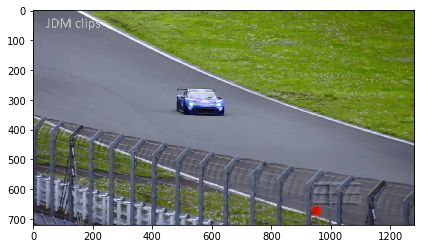

In [3]:
%matplotlib inline 
from skimage import io, data, color
import numpy as np


#Wir nehmen das racecar bild und moechten den Rasen erkennen und waehlen die maske so, dass nur der obere Rasen erkennbar ist
image = io.imread('images/racecar.png')
io.imshow(image)

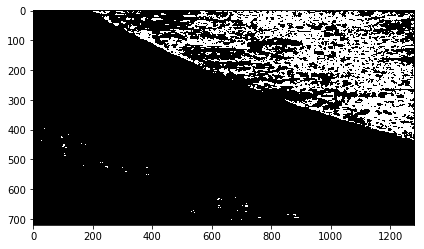

In [4]:
p_max = [119,145,43]
p_min = [85,113,8]

#bild fuer die struktur kopieren dann alles ausserhalb der maske schwaerzen
filter_image = np.copy(image)
for i in range(720):
    for j in range(1280):
        if image[i][j][0] >= p_min[0] and image[i][j][0] <= p_max[0] and image[i][j][1] >= p_min[1] and image[i][j][1] <= p_max[1] and image[i][j][2] >= p_min[2] and image[i][j][2] <= p_max[2]:
            #filter_image[i][j] = image[i][j]
            filter_image[i][j] = [255,255,255]
        else: 
            filter_image[i][j] = [0,0,0]
#print(filter_image)
io.imshow(filter_image)

## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with one-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

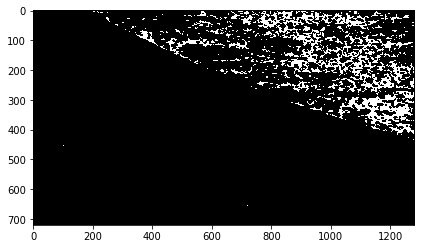

In [8]:
def erodate(image,i,j):
    if(((image[i+1][j] is None) or rgb_zsm(image[i+1][j]) > 0) and ((image[i-1][j] is None) or rgb_zsm(image[i-1][j]) > 0) and ((image[i][j+1] is None) or rgb_zsm(image[i][j+1]) > 0) and ((image[i][j-1] is None) or rgb_zsm(image[i][j-1]) > 0)):
        return True

def rgb_zsm(pixel):
    return (int(pixel[0])+int(pixel[1])+int(pixel[2]))

#def rgb_alle(pixel):
    #return((pixel[0] > 0) and (pixel[1] > 0) and (pixel[2] > 0))

after_erosion = np.copy(filter_image)
    
def main_erosion():
    delete_those = []
    for i in range(719):
        for j in range(1279):
            if (rgb_zsm(after_erosion[i][j]))>0:
                if(not(erodate(after_erosion,i,j))):
                    #after_erosion[i][j] = [0,0,0]
                    delete_those.append([i,j])
                    
    for k in range(len(delete_those)):
        after_erosion[delete_those[k][0]][delete_those[k][1]] = [0,0,0]

main_erosion()
main_erosion()
    
io.imshow(after_erosion)            

('We are making progress... number of black pixels: ', 827895)
('We are making progress... number of black pixels: ', 801326)
('We are making progress... number of black pixels: ', 775545)
('We are making progress... number of black pixels: ', 753645)
('We are making progress... number of black pixels: ', 735489)
('We are making progress... number of black pixels: ', 720344)
('We are making progress... number of black pixels: ', 707619)
('We are making progress... number of black pixels: ', 696856)
('We are making progress... number of black pixels: ', 687603)


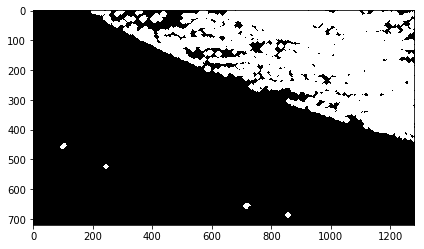

In [9]:
import numpy as np
def dilatieren(image,i,j):
    if(((image[i+1][j] is None) or rgb_zsm(image[i+1][j]) > 0) or ((image[i-1][j] is None) or rgb_zsm(image[i-1][j]) > 0) or ((image[i][j+1] is None) or rgb_zsm(image[i][j+1]) > 0) or ((image[i][j-1] is None) or rgb_zsm(image[i][j-1]) > 0)):
        return True

after_dilation = np.copy(after_erosion)

def main_dilatieren():
    add_those = []
    anzahl_schwarz = 0
    for i in range(719):
        for j in range(1279):
            if (rgb_zsm(after_dilation[i][j])==0):
                if(dilatieren(after_dilation,i,j)):
                    add_those.append([i,j])
                else:
                    anzahl_schwarz = anzahl_schwarz+1

    print("We are making progress... number of black pixels: ",anzahl_schwarz)
    for k in range(len(add_those)):
        after_dilation[add_those[k][0]][add_those[k][1]] = [255,255,255]
        
        

main_dilatieren()
main_dilatieren()
main_dilatieren()
main_dilatieren()
main_dilatieren()
main_dilatieren()
main_dilatieren()
main_dilatieren()
main_dilatieren()

io.imshow(after_dilation) 

## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)

(see images/racecar or images/taco for sample image sequences)